<a href="https://colab.research.google.com/github/AmitMane1993/hello-world/blob/master/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the necessary libraries**
---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the House prices dataset into dataframe named `data`




In [0]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/my_work/Copy of dataset_houseprice_20200110.csv",index_col=0)

In [0]:
data_1 = data

In [0]:
data = data_1

# Looking for first five rows of data

In [6]:
data.head()

,Mission_Nb,Apt_ID,Estimated_Price,Sold_Price,Customer_Nb,Apt_Nb,Mission_Date,Acceptance_Date,Transfer_Date,Floor,Lift,Completion_Date,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Community_Loan,Updated,Apt_Type,Apt_Category,Nb_of_Rooms,Post_Code,Street_Nb,Street_Name,Parking_Type,Parking_Description
BBL,,,,,,,,,,,,,,,,,,,,,,,,,,
BATE,100058033,51AED98D6EAC441A8576029E4ADD4EE9,3550000.0,3500000.0,100,7,2019-10-07 00:00:00 UTC,2019-12-05 00:00:00 UTC,2020-01-03 00:00:00 UTC,0,False,1963-01-01 00:00:00 UTC,90.0,NaN,NaN,90.0,278646.84,2020-01-03 15:10:43 UTC,Leilighet,4-roms,4.0,4023,3.0,Agathe Backer Grøndahls vei,PU,Fellesparkering ute
SORBBL,100007095,3CEA30EA5629450F8444EF85A2698C27,NaN,170000.0,311,7,NaN,1998-12-01 00:00:00 UTC,1998-12-01 00:00:00 UTC,2,False,1969-12-31 00:00:00 UTC,NaN,34.0,37.0,33.0,331240.05,2018-03-27 13:21:20 UTC,Leilighet,311-001,2.0,4700,6.0,Skolevegen,F,Felles parkeringsplass
KBBL,100001456,CB8E121D07624327A82AFD195EC86169,NaN,NaN,180,416,NaN,NaN,2009-08-01 00:00:00 UTC,4,True,2007-11-01 00:00:00 UTC,NaN,96.0,NaN,NaN,1450800.00,2016-08-01 10:57:05 UTC,Flermannsbolig,leilighet,3.0,6507,1.0,Sjursvikveien,FG,Eier plass i garasjeanlegg
KBBL,100001284,ABE758E620914AC389732C9D63E4C478,NaN,NaN,180,417,NaN,NaN,2007-11-12 00:00:00 UTC,4,True,2007-11-01 00:00:00 UTC,NaN,156.0,NaN,NaN,1625000.00,2017-05-10 08:33:32 UTC,Flermannsbolig,leilighet,4.0,6507,1.0,Sjursvikveien,FG,Eier plass i garasjeanlegg
KBBL,100001263,2BB654EA324943E4B6FC6EEDA018FA0B,NaN,NaN,180,310,NaN,NaN,2008-03-07 00:00:00 UTC,3,True,2007-11-01 00:00:00 UTC,NaN,69.0,NaN,NaN,997705.38,2020-01-02 12:02:24 UTC,Flermannsbolig,leilighet,2.0,6507,1.0,Sjursvikveien,FG,Eier plass i garasjeanlegg


In [0]:
data = data.reset_index()

# Let's look for some important information of dataset.

In [8]:
data.shape

(998396, 27)

> - ***Dataset is having `998396` records having `27` features.***

### Concise summary of a DataFrame after dropping duplicate rows and un-necessary columns

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998396 entries, 0 to 998395
Data columns (total 27 columns):
BBL                    998396 non-null object
Mission_Nb             998396 non-null int64
Apt_ID                 998396 non-null object
Estimated_Price        155269 non-null float64
Sold_Price             672434 non-null float64
Customer_Nb            998396 non-null int64
Apt_Nb                 998396 non-null int64
Mission_Date           466566 non-null object
Acceptance_Date        489999 non-null object
Transfer_Date          950486 non-null object
Floor                  827841 non-null object
Lift                   998396 non-null bool
Completion_Date        427668 non-null object
Living_Area            477687 non-null float64
Usable_Area            482712 non-null float64
Brutto_Area            100065 non-null float64
Primary_Area           307470 non-null float64
Community_Loan         855978 non-null float64
Updated                978441 non-null object
Apt_Type     

In [10]:
data.BBL.value_counts().count()

36

In [11]:
data.Mission_Nb.value_counts().count()

278780

In [12]:
data.Apt_ID.value_counts().count()

782630

In [13]:
data.Mission_Nb.is_unique

False

In [14]:
data.Apt_ID.is_unique

False

> - `Mission_Nb` and `Apt_Nb` can be the identifier for the each row. There should be unique values for these columns.
> - The above result shows that there are duplicates records present in dataset if we consider one of them as identifier and we need remove those duplicate records.

In [15]:
data[data.Mission_Nb == 100007095]

,BBL,Mission_Nb,Apt_ID,Estimated_Price,Sold_Price,Customer_Nb,Apt_Nb,Mission_Date,Acceptance_Date,Transfer_Date,Floor,Lift,Completion_Date,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Community_Loan,Updated,Apt_Type,Apt_Category,Nb_of_Rooms,Post_Code,Street_Nb,Street_Name,Parking_Type,Parking_Description
1,SORBBL,100007095,3CEA30EA5629450F8444EF85A2698C27,NaN,170000.0,311,7,NaN,1998-12-01 00:00:00 UTC,1998-12-01 00:00:00 UTC,2,False,1969-12-31 00:00:00 UTC,NaN,34.0,37.0,33.0,331240.05,2018-03-27 13:21:20 UTC,Leilighet,311-001,2.0,4700,6.0,Skolevegen,F,Felles parkeringsplass
34052,BORI,100007095,D78BA731F4134893A00B4FCA32DF75B4,NaN,1350000.0,272,724,NaN,NaN,2007-02-20 00:00:00 UTC,3,False,NaN,NaN,49.0,NaN,NaN,72518.41,2013-08-27 14:22:18 UTC,Leilighet,Kategori 10,2.0,2013,39.0,Riihimækiveien,E,Se egen info
57717,SORBBL,100007095,3CEA30EA5629450F8444EF85A2698C27,NaN,170000.0,311,7,NaN,1998-12-01 00:00:00 UTC,1998-12-01 00:00:00 UTC,2,False,1969-12-31 00:00:00 UTC,NaN,34.0,37.0,33.0,321075.34,2020-01-02 15:32:37 UTC,Leilighet,311-001,2.0,4700,6.0,Skolevegen,F,Felles parkeringsplass
99729,SKIEN,100007095,E3B2825DA7124CF3B269979B7458BDB0,NaN,370000.0,97,4260,NaN,1988-07-04 00:00:00 UTC,1988-07-04 00:00:00 UTC,NaN,False,1980-01-01 00:00:00 UTC,95.0,NaN,NaN,NaN,292022.00,2014-06-06 12:56:12 UTC,Leilighet,097-441,4.0,3711,50.0,Borgemarka,I,Ingen
118557,LABO,100007095,AA26F9B1EEFB49AC9584193E5CA3CF57,NaN,NaN,50,9,NaN,NaN,2009-12-01 00:00:00 UTC,1,False,1974-01-01 00:00:00 UTC,85.0,NaN,NaN,NaN,666600.29,2009-12-22 08:47:22 UTC,Leilighet,050-001,4.0,3274,109.0,Hovlandveien,I,Ingen
119715,OBF,100007095,237F0F5A5935490294CCCF87CEA65025,NaN,150000.0,374,3,NaN,1996-07-01 00:00:00 UTC,1996-07-01 00:00:00 UTC,A2H,False,NaN,52.0,58.0,NaN,NaN,256160.04,2012-01-17 10:29:05 UTC,Leilighet,374-002,2.0,0553,18.0,HELGESENS GATE,I,Ingen
179043,VANSJOBBL,100007095,068E568346794578BC1954D1AEC84620,1100000.0,1100000.0,201,61,2011-04-20 00:00:00 UTC,2011-04-20 00:00:00 UTC,2011-07-07 00:00:00 UTC,1,False,1956-02-25 00:00:00 UTC,NaN,44.0,NaN,NaN,117547.10,2017-06-07 08:40:57 UTC,Leilighet,2 roms korsd B/E,2.0,1580,10.0,Skoleveien,I,Ingen
394444,PBBL,100007095,54FE5038750E4B6C9387D7499492086D,NaN,375000.0,38,1019,NaN,2000-12-20 00:00:00 UTC,2000-12-20 00:00:00 UTC,3.,False,NaN,39.0,NaN,NaN,NaN,135802.00,2016-07-13 10:50:20 UTC,Leilighet,001-2 rom,2.0,3946,20.0,Skrivervegen,I,Ingen
413186,NBBO,100007095,F2793FDD3AD64244857EF22913574590,NaN,NaN,541,5,NaN,NaN,2007-02-15 00:00:00 UTC,2,False,NaN,NaN,115.0,146.0,NaN,NaN,2007-03-22 11:59:15 UTC,Leilighet,Kategori 1,NaN,3400,12.0,Fjordsvingen,C,Carport
413875,MOBORANA,100007095,3305AC8912634555870A7AC9BC526893,NaN,NaN,187,5,2019-08-20 00:00:00 UTC,2019-07-03 00:00:00 UTC,2019-07-23 00:00:00 UTC,2,False,NaN,NaN,78.0,NaN,NaN,1745000.00,2019-09-02 15:49:44 UTC,Leilighet,3-roms,3.0,NaN,11.0,Svartflågveien,C,Carport


> - Above result show that there are multiple records for particular 'Mission_Nb' having different values for other features. So it can't be the identifier.
> - We can check for duplicates records based on `'Apt_ID'`.

In [16]:
data[data.Apt_ID == 'DBC59FA3287D4FBAA52E1518D03BCE27']

,BBL,Mission_Nb,Apt_ID,Estimated_Price,Sold_Price,Customer_Nb,Apt_Nb,Mission_Date,Acceptance_Date,Transfer_Date,Floor,Lift,Completion_Date,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Community_Loan,Updated,Apt_Type,Apt_Category,Nb_of_Rooms,Post_Code,Street_Nb,Street_Name,Parking_Type,Parking_Description
794318,BATE,100007095,DBC59FA3287D4FBAA52E1518D03BCE27,1530000.0,1675000.0,102,135,2006-09-14 00:00:00 UTC,2006-09-26 00:00:00 UTC,2006-10-06 00:00:00 UTC,6,True,1973-01-01 00:00:00 UTC,63.0,NaN,NaN,63.0,209768.6,2019-05-31 10:36:41 UTC,Leilighet,2-roms,2.0,4022,11.0,Rektor Berntsens gate,U,Uspesifisert parkering
854359,BATE,100007095,DBC59FA3287D4FBAA52E1518D03BCE27,1530000.0,1675000.0,102,135,2006-09-14 00:00:00 UTC,2006-09-26 00:00:00 UTC,2006-10-06 00:00:00 UTC,6,True,1973-01-01 00:00:00 UTC,63.0,NaN,NaN,63.0,211767.1,2019-01-22 13:46:24 UTC,Leilighet,2-roms,2.0,4022,11.0,Rektor Berntsens gate,U,Uspesifisert parkering


In [17]:
data[data.Apt_ID == '2BB654EA324943E4B6FC6EEDA018FA0B']

,BBL,Mission_Nb,Apt_ID,Estimated_Price,Sold_Price,Customer_Nb,Apt_Nb,Mission_Date,Acceptance_Date,Transfer_Date,Floor,Lift,Completion_Date,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Community_Loan,Updated,Apt_Type,Apt_Category,Nb_of_Rooms,Post_Code,Street_Nb,Street_Name,Parking_Type,Parking_Description
4,KBBL,100001263,2BB654EA324943E4B6FC6EEDA018FA0B,NaN,NaN,180,310,NaN,NaN,2008-03-07 00:00:00 UTC,3,True,2007-11-01 00:00:00 UTC,NaN,69.0,NaN,NaN,997705.38,2020-01-02 12:02:24 UTC,Flermannsbolig,leilighet,2.0,6507,1.0,Sjursvikveien,FG,Eier plass i garasjeanlegg
23073,KBBL,100001263,2BB654EA324943E4B6FC6EEDA018FA0B,NaN,NaN,180,310,NaN,NaN,2008-03-07 00:00:00 UTC,3,True,2007-11-01 00:00:00 UTC,NaN,69.0,NaN,NaN,890000.00,2019-03-07 11:21:25 UTC,Flermannsbolig,leilighet,2.0,6507,1.0,Sjursvikveien,FG,Eier plass i garasjeanlegg


In [18]:
data.shape

(998396, 27)

In [19]:
data[data.duplicated(subset=['Apt_ID','Mission_Nb'])]

,BBL,Mission_Nb,Apt_ID,Estimated_Price,Sold_Price,Customer_Nb,Apt_Nb,Mission_Date,Acceptance_Date,Transfer_Date,Floor,Lift,Completion_Date,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Community_Loan,Updated,Apt_Type,Apt_Category,Nb_of_Rooms,Post_Code,Street_Nb,Street_Name,Parking_Type,Parking_Description
381,BORI,100041145,624198AC1C694EECABBB6DBCC785FF58,NaN,2700000.0,203,8,2019-03-27 14:48:14 UTC,2019-04-10 00:00:00 UTC,2019-06-24 00:00:00 UTC,2,False,NaN,NaN,71.0,NaN,NaN,530481.34,2016-08-08 10:27:43 UTC,Leilighet,Kategori 10,3.0,2010,4.0,Egnehjemveien,E,Se egen info
515,BATE,100058033,51AED98D6EAC441A8576029E4ADD4EE9,3550000.0,NaN,100,7,2019-10-07 16:49:03 UTC,NaN,NaN,0,False,1963-01-01 00:00:00 UTC,90.0,NaN,NaN,90.0,287645.25,2017-08-24 10:54:17 UTC,Leilighet,4-roms,4.0,4023,3.0,Agathe Backer Grøndahls vei,PU,Fellesparkering ute
551,TOBB,1000077654,CCC8D25F7B3247BE8F1122FD1E233ABF,NaN,NaN,1006,72,NaN,NaN,2018-12-04 00:00:00 UTC,2,True,NaN,NaN,82.0,NaN,NaN,NaN,2019-09-04 08:57:45 UTC,Bolig,82 kvm,3.0,NaN,7.0,Øvre Granåslia,NS,Kjøpt plass i p.kjeller. Kan følge leiligheten...
588,TOBB,1000077213,2A295FF850ED4394A54389B21B65563C,NaN,NaN,888,29,NaN,NaN,2019-01-01 00:00:00 UTC,5,True,NaN,NaN,128.0,NaN,NaN,NaN,2019-05-29 07:47:09 UTC,Bolig,3-roms 128 m2,3.0,NaN,6.0,Dokkgata,LP,Følger en p.plass i lukket parkeringskjeller m...
686,TOBB,1000083761,D064F9B4007A4654986DC551ADB0051E,NaN,NaN,1086,14,NaN,NaN,2020-01-01 00:00:00 UTC,0,True,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-20 10:47:18 UTC,Bolig,Leilighet,NaN,NaN,7.0,Nardovegen,NI,Ingen parkering på eiendommen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998388,SOBBL,100005536,90E053F82AC8467A95045FEBE189B84C,NaN,700000.0,50,62,NaN,NaN,2005-03-11 00:00:00 UTC,01,False,NaN,NaN,NaN,NaN,57.0,208507.88,2019-10-23 13:51:06 UTC,Leilighet,Kategori 1,2.0,1709,37.0,Blessomveien,M,Biloppstillingsplass - borettslaget har noen g...
998389,SOBBL,100022297,C7356682FA1949988F6BA0356975FB5E,NaN,NaN,50,65,2019-05-21 14:19:35 UTC,NaN,NaN,02,False,NaN,NaN,NaN,NaN,57.0,218389.28,2018-11-07 09:12:06 UTC,Leilighet,Kategori 1,2.0,1709,37.0,Blessomveien,M,Biloppstillingsplass - borettslaget har noen g...
998390,SOBBL,100018370,59B14D6810F44827ABBD427C6F02E4CD,NaN,1200000.0,50,83,2013-07-22 00:00:00 UTC,2013-08-23 00:00:00 UTC,2013-10-18 00:00:00 UTC,02,False,NaN,NaN,NaN,NaN,56.0,215081.25,2019-06-18 12:48:43 UTC,Leilighet,Kategori 1,2.0,1709,37.0,Blessomveien,M,Biloppstillingsplass - borettslaget har noen g...
998394,SOBBL,100014393,1698D56CF1D34AA5AA9F01CD900639DD,NaN,790000.0,411,407,NaN,2008-10-02 00:00:00 UTC,2008-10-02 00:00:00 UTC,4,True,NaN,NaN,NaN,NaN,52.0,545809.15,2018-01-17 10:16:03 UTC,Leilighet,Kategori 1,2.0,1718,114.0,Dalveien,M,Biloppstillingsplass - borettslaget har noen g...


In [20]:
data[(data.Apt_ID == '624198AC1C694EECABBB6DBCC785FF58')]

,BBL,Mission_Nb,Apt_ID,Estimated_Price,Sold_Price,Customer_Nb,Apt_Nb,Mission_Date,Acceptance_Date,Transfer_Date,Floor,Lift,Completion_Date,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Community_Loan,Updated,Apt_Type,Apt_Category,Nb_of_Rooms,Post_Code,Street_Nb,Street_Name,Parking_Type,Parking_Description
380,BORI,100041145,624198AC1C694EECABBB6DBCC785FF58,NaN,2700000.0,203,8,2019-03-27 00:00:00 UTC,2019-04-10 00:00:00 UTC,2019-06-21 00:00:00 UTC,2,False,NaN,NaN,71.0,NaN,NaN,520890.21,2019-07-12 15:46:46 UTC,Leilighet,Kategori 10,3.0,2010,4.0,Egnehjemveien,E,Se egen info
381,BORI,100041145,624198AC1C694EECABBB6DBCC785FF58,NaN,2700000.0,203,8,2019-03-27 14:48:14 UTC,2019-04-10 00:00:00 UTC,2019-06-24 00:00:00 UTC,2,False,NaN,NaN,71.0,NaN,NaN,530481.34,2016-08-08 10:27:43 UTC,Leilighet,Kategori 10,3.0,2010,4.0,Egnehjemveien,E,Se egen info
20717,BORI,100041145,624198AC1C694EECABBB6DBCC785FF58,NaN,2700000.0,203,8,2019-03-27 00:00:00 UTC,2019-04-10 00:00:00 UTC,2019-06-21 00:00:00 UTC,2,False,NaN,NaN,71.0,NaN,NaN,530481.34,2016-08-08 10:27:43 UTC,Leilighet,Kategori 10,3.0,2010,4.0,Egnehjemveien,E,Se egen info
54252,BORI,100041145,624198AC1C694EECABBB6DBCC785FF58,NaN,2700000.0,203,8,2019-03-27 14:48:14 UTC,2019-04-10 00:00:00 UTC,2019-06-24 00:00:00 UTC,2,False,NaN,NaN,71.0,NaN,NaN,520890.21,2019-07-12 15:46:46 UTC,Leilighet,Kategori 10,3.0,2010,4.0,Egnehjemveien,E,Se egen info


In [21]:
data[data.Mission_Nb == 100041145]

,BBL,Mission_Nb,Apt_ID,Estimated_Price,Sold_Price,Customer_Nb,Apt_Nb,Mission_Date,Acceptance_Date,Transfer_Date,Floor,Lift,Completion_Date,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Community_Loan,Updated,Apt_Type,Apt_Category,Nb_of_Rooms,Post_Code,Street_Nb,Street_Name,Parking_Type,Parking_Description
380,BORI,100041145,624198AC1C694EECABBB6DBCC785FF58,NaN,2700000.0,203,8,2019-03-27 00:00:00 UTC,2019-04-10 00:00:00 UTC,2019-06-21 00:00:00 UTC,2,False,NaN,NaN,71.0,NaN,NaN,520890.21,2019-07-12 15:46:46 UTC,Leilighet,Kategori 10,3.0,2010,4.0,Egnehjemveien,E,Se egen info
381,BORI,100041145,624198AC1C694EECABBB6DBCC785FF58,NaN,2700000.0,203,8,2019-03-27 14:48:14 UTC,2019-04-10 00:00:00 UTC,2019-06-24 00:00:00 UTC,2,False,NaN,NaN,71.0,NaN,NaN,530481.34,2016-08-08 10:27:43 UTC,Leilighet,Kategori 10,3.0,2010,4.0,Egnehjemveien,E,Se egen info
20717,BORI,100041145,624198AC1C694EECABBB6DBCC785FF58,NaN,2700000.0,203,8,2019-03-27 00:00:00 UTC,2019-04-10 00:00:00 UTC,2019-06-21 00:00:00 UTC,2,False,NaN,NaN,71.0,NaN,NaN,530481.34,2016-08-08 10:27:43 UTC,Leilighet,Kategori 10,3.0,2010,4.0,Egnehjemveien,E,Se egen info
54252,BORI,100041145,624198AC1C694EECABBB6DBCC785FF58,NaN,2700000.0,203,8,2019-03-27 14:48:14 UTC,2019-04-10 00:00:00 UTC,2019-06-24 00:00:00 UTC,2,False,NaN,NaN,71.0,NaN,NaN,520890.21,2019-07-12 15:46:46 UTC,Leilighet,Kategori 10,3.0,2010,4.0,Egnehjemveien,E,Se egen info
479603,USBL,100041145,6D39C805FDFF4E438590A30D9CC9E4AA,NaN,1250000.0,948,10,NaN,2003-08-04 00:00:00 UTC,2003-08-04 00:00:00 UTC,1+2,False,1977-01-01 00:00:00 UTC,100.0,NaN,NaN,133.0,203478.52,2017-02-13 16:24:59 UTC,Leilighet,4-roms med garasje,4.0,3188,6.0,Redaktør Thommessens gate,G,Egen garasje
568681,BATE,100041145,9dd216daf5e34d58bc05f7913dc1ab07,NaN,0.0,328,71,NaN,1989-04-24 00:00:00 UTC,1989-04-24 00:00:00 UTC,3,False,NaN,NaN,51.0,NaN,NaN,222068.48,2019-03-11 11:03:40 UTC,Leilighet,Brøk 51,2.0,4315,28.0,Tyrihansveien,P,Parkeringsplass


In [22]:
data[(data.Mission_Nb == 100041145)].duplicated(subset=['Mission_Nb','Apt_ID'],keep = 'first')

380       False
381        True
20717      True
54252      True
479603    False
568681    False
dtype: bool

### With above observation we can conclude that,
> - There might be possibility that one apartment can have been sold several times.
> - There are some records where `'Apt_ID'` is same and `'Mission_Nb'` is different having records of apartment sold several times through years.
> - So we can drop duplicates based on both `'Apt_ID'` and `'Mission_Nb'` if present.

In [0]:
data.drop_duplicates(subset=['Mission_Nb','Apt_ID'],keep = 'first', inplace = True)

In [24]:
data.Apt_ID.is_unique

True

In [25]:
data.Mission_Nb.is_unique

False

#### Shape of dataset after dropping duplicate records.

In [26]:
data.shape

(782630, 27)

> - ***current dataset is having `782630` records having `27` features.***

In [27]:
data.Sold_Price.isna().sum().sum()

248884

In [28]:
data.Estimated_Price.isna().sum().sum()

661743

In [29]:
data[(data.Sold_Price.isna()) & (data.Estimated_Price.isna())].shape

(244796, 27)

In [30]:
data[(data.Sold_Price.notna()) & (data.Estimated_Price.isna())].shape

(416947, 27)

In [31]:
data[(data.Sold_Price.isna()) & (data.Estimated_Price.notna())].shape

(4088, 27)

In [32]:
data[(data.Sold_Price.notna()) & (data.Estimated_Price.notna())].shape

(116799, 27)

> - `'Sold_Price'` can be our target feature as we need to build model to predict the price for house given new data values.
> - But there are 248884 records for which `'Sold_Price'` is having null values.
> - Also there are 661743 records for which `'Estimated_Price'` is having null values.
> - `'Sold_Price'` and `'Estimated_Price'` are going in sync.
> - So we can assign values of `'Sold_Price'` and `'Estimated_Price'` to each other where one them is having null value. 
> - Then we can drop only records where `'Sold_Price'` and `'Estimated_Price'` both are null.

In [0]:
data[(data.Sold_Price.isna()) & (data.Estimated_Price.notna())].replace(data[(data.Sold_Price.isna()) & (data.Estimated_Price.notna())]['Sold_Price'],\
                                                                        data[(data.Sold_Price.isna()) & (data.Estimated_Price.notna())]['Estimated_Price'],inplace = True)

In [0]:
data.loc[(data.Sold_Price.isna()) & (data.Estimated_Price.notna()),'Sold_Price'] = data[(data.Sold_Price.isna()) & (data.Estimated_Price.notna())]['Estimated_Price']

In [0]:
data.loc[(data.Sold_Price.notna()) & (data.Estimated_Price.isna()),'Estimated_Price'] = data[(data.Sold_Price.notna()) & (data.Estimated_Price.isna())]['Sold_Price']

In [36]:
data[(data.Sold_Price.isna()) & (data.Estimated_Price.notna())].shape

(0, 27)

In [37]:
data[(data.Sold_Price.notna()) & (data.Estimated_Price.isna())].shape

(0, 27)

In [38]:
data.Sold_Price.isna().sum().sum()

244796

In [39]:
data[(data.Sold_Price.notna()) & (data.Estimated_Price.notna())].shape

(537834, 27)

In [0]:
data.drop(data[(data.Sold_Price.isna()) & (data.Estimated_Price.isna())].index,axis = 0, inplace = True)

In [0]:
data.drop('Estimated_Price',axis = 1, inplace = True)

In [42]:
data.shape

(537834, 26)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537834 entries, 0 to 998393
Data columns (total 26 columns):
BBL                    537834 non-null object
Mission_Nb             537834 non-null int64
Apt_ID                 537834 non-null object
Sold_Price             537834 non-null float64
Customer_Nb            537834 non-null int64
Apt_Nb                 537834 non-null int64
Mission_Date           294609 non-null object
Acceptance_Date        382767 non-null object
Transfer_Date          528689 non-null object
Floor                  459142 non-null object
Lift                   537834 non-null bool
Completion_Date        259265 non-null object
Living_Area            284492 non-null float64
Usable_Area            234684 non-null float64
Brutto_Area            57000 non-null float64
Primary_Area           192577 non-null float64
Community_Loan         496543 non-null float64
Updated                522920 non-null object
Apt_Type               537834 non-null object
Apt_Category   

# Let's look for correlation of numerical columns (`'Living_Area'`, `'Usable_Area'`,`'Brutto_Area'`, `'Primary_Area'` and `'Community_Loan'` on `'Sold_Price`')

In [0]:
con_num = data[['Living_Area', 'Usable_Area','Brutto_Area', 'Primary_Area', 'Community_Loan','Sold_Price']]

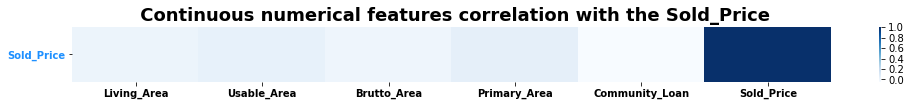

In [45]:
numcorr=con_num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['Sold_Price'], ascending=False).head(1), cmap='Blues')
plt.title(" Continuous numerical features correlation with the Sold_Price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

In [46]:
Num=numcorr['Sold_Price'].sort_values(ascending=False).head(6).to_frame()

cm = sns.light_palette("cyan", as_cmap=True)

s = Num.style.background_gradient(cmap=cm)
s

,Sold_Price
Sold_Price,1
Primary_Area,0.0553384
Usable_Area,0.0442886
Living_Area,0.0197408
Brutto_Area,0.0119982
Community_Loan,-0.038974


In [47]:
data[(data.Primary_Area.notna()) & (data.Usable_Area.notna()) & (data.Living_Area.notna()) & (data.Brutto_Area.notna())][['Living_Area', 'Usable_Area','Brutto_Area', 'Primary_Area', 'Sold_Price']]

,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Sold_Price
43,75.0,91.0,97.0,80.0,1660000.0
47,67.0,80.0,90.0,67.0,1540000.0
48,71.0,71.0,75.0,71.0,1650000.0
49,80.0,79.0,84.0,79.0,2112000.0
53,61.0,63.0,69.0,63.0,1490000.0
...,...,...,...,...,...
957430,46.0,46.0,51.0,46.0,900000.0
957910,56.0,64.0,64.0,56.0,450000.0
961736,0.0,50.0,0.0,50.0,514300.0
961737,0.0,50.0,0.0,50.0,213300.0


In [0]:
con_num_1 = data[((data.Primary_Area.notna()) & (data.Usable_Area.notna()) & (data.Living_Area.notna()) & (data.Brutto_Area.notna())) & \
((data.Primary_Area > 0) & (data.Usable_Area > 0) & (data.Living_Area > 0) & (data.Brutto_Area > 0)) \
][['Living_Area', 'Usable_Area','Brutto_Area', 'Primary_Area', 'Sold_Price']]

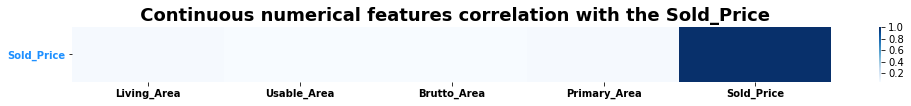

In [49]:
numcorr_1=con_num_1.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr_1.sort_values(by=['Sold_Price'], ascending=False).head(1), cmap='Blues')
plt.title(" Continuous numerical features correlation with the Sold_Price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

In [50]:
Num=numcorr_1['Sold_Price'].sort_values(ascending=False).head(5).to_frame()
cm = sns.light_palette("cyan", as_cmap=True)
s = Num.style.background_gradient(cmap=cm)
s

,Sold_Price
Sold_Price,1
Primary_Area,0.0674848
Living_Area,0.06692
Usable_Area,0.056289
Brutto_Area,0.0542192


In [0]:
con_num_1['Total_Area'] = con_num_1['Living_Area'] + con_num_1['Usable_Area'] + con_num_1['Brutto_Area'] + con_num_1['Primary_Area']

In [52]:
con_num_1

,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Sold_Price,Total_Area
43,75.0,91.0,97.0,80.0,1660000.0,343.0
47,67.0,80.0,90.0,67.0,1540000.0,304.0
48,71.0,71.0,75.0,71.0,1650000.0,288.0
49,80.0,79.0,84.0,79.0,2112000.0,322.0
53,61.0,63.0,69.0,63.0,1490000.0,256.0
...,...,...,...,...,...,...
956904,99.0,99.0,105.0,99.0,1375000.0,402.0
957122,45.0,44.0,47.0,44.0,900000.0,180.0
957127,49.0,49.0,54.0,49.0,510000.0,201.0
957430,46.0,46.0,51.0,46.0,900000.0,189.0


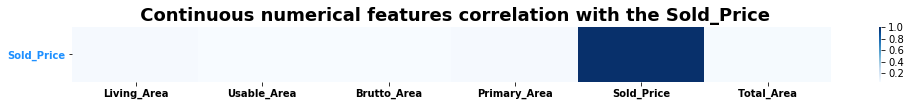

In [53]:
numcorr_1=con_num_1.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr_1.sort_values(by=['Sold_Price'], ascending=False).head(1), cmap='Blues')
plt.title(" Continuous numerical features correlation with the Sold_Price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

In [54]:
Num=numcorr_1['Sold_Price'].sort_values(ascending=False).head(6).to_frame()
cm = sns.light_palette("cyan", as_cmap=True)
s = Num.style.background_gradient(cmap=cm)
s

,Sold_Price
Sold_Price,1
Primary_Area,0.0674848
Living_Area,0.06692
Total_Area,0.0627768
Usable_Area,0.056289
Brutto_Area,0.0542192


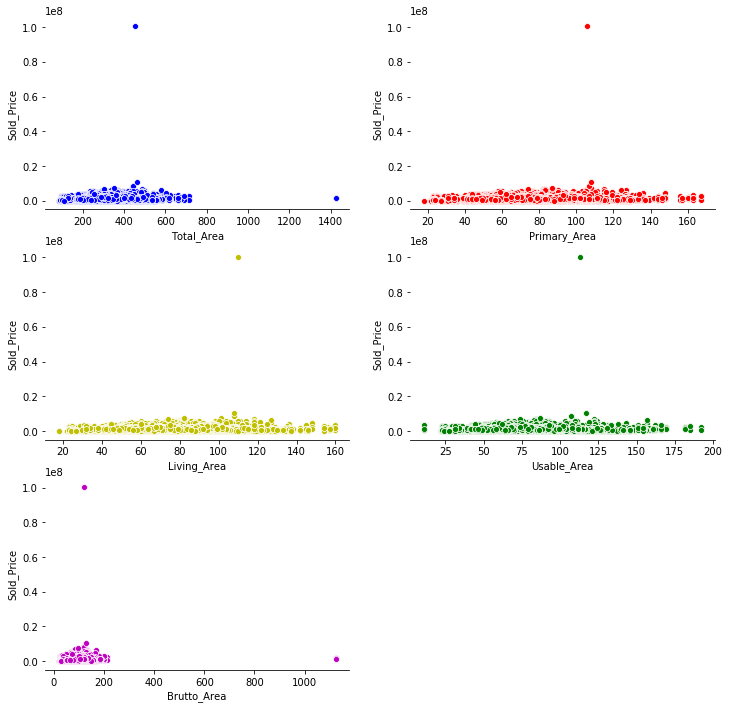

In [55]:
# Set up the matplotlib figure
f, axes = plt.subplots(figsize=(12,12), ncols=2, nrows=3)
sns.despine(left=True)
sns.scatterplot(x= con_num_1.Total_Area, y= con_num_1.Sold_Price, color="b", ax=axes[0, 0])
sns.scatterplot(x= con_num_1.Primary_Area, y= con_num_1.Sold_Price, color="r", ax=axes[0, 1])
sns.scatterplot(x= con_num_1.Living_Area, y= con_num_1.Sold_Price, color="y", ax=axes[1, 0])
sns.scatterplot(x= con_num_1.Usable_Area, y= con_num_1.Sold_Price, color="g", ax=axes[1, 1])
sns.scatterplot(x= con_num_1.Brutto_Area, y= con_num_1.Sold_Price, color="m", ax=axes[2, 0])
axes[2,1].remove();

### All the area columns that we have with not null values and if we plot scatterplot of them with target feature `'Sold_Price'` then we find that,
> -  Correlation of all the variable with target feature is not seems to be good.
> - There is slight better correlation present between `'Brutto_Area'` and `'Sold_Price'`
> - Also we can see extreme values. That might be outliers.

In [56]:
con_num_1

,Living_Area,Usable_Area,Brutto_Area,Primary_Area,Sold_Price,Total_Area
43,75.0,91.0,97.0,80.0,1660000.0,343.0
47,67.0,80.0,90.0,67.0,1540000.0,304.0
48,71.0,71.0,75.0,71.0,1650000.0,288.0
49,80.0,79.0,84.0,79.0,2112000.0,322.0
53,61.0,63.0,69.0,63.0,1490000.0,256.0
...,...,...,...,...,...,...
956904,99.0,99.0,105.0,99.0,1375000.0,402.0
957122,45.0,44.0,47.0,44.0,900000.0,180.0
957127,49.0,49.0,54.0,49.0,510000.0,201.0
957430,46.0,46.0,51.0,46.0,900000.0,189.0


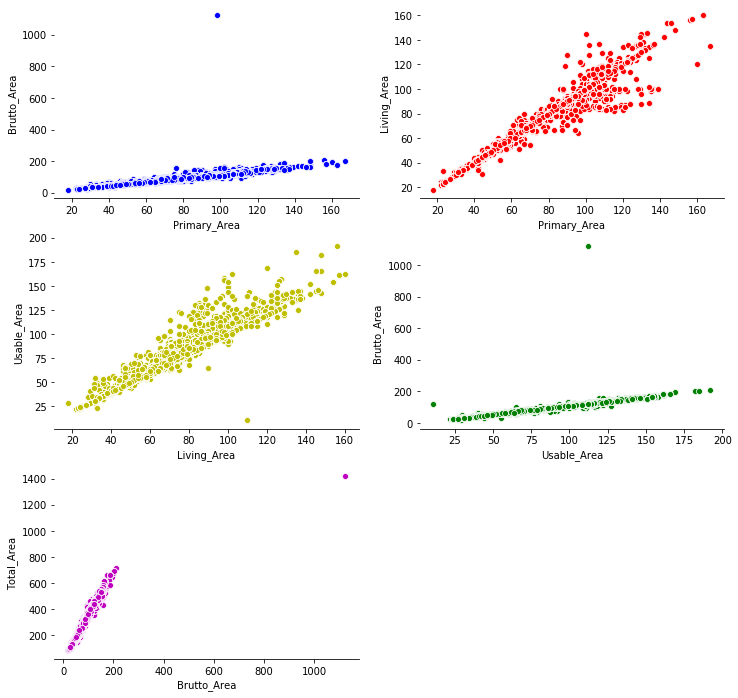

In [57]:
# Set up the matplotlib figure
f, axes = plt.subplots(figsize=(12,12), ncols=2, nrows=3)
sns.despine(left=True)
sns.scatterplot(x= con_num_1.Primary_Area, y= con_num_1.Brutto_Area, color="b", ax=axes[0, 0])
sns.scatterplot(x= con_num_1.Primary_Area, y= con_num_1.Living_Area, color="r", ax=axes[0, 1])
sns.scatterplot(x= con_num_1.Living_Area, y= con_num_1.Usable_Area, color="y", ax=axes[1, 0])
sns.scatterplot(x= con_num_1.Usable_Area, y= con_num_1.Brutto_Area, color="g", ax=axes[1, 1])
sns.scatterplot(x= con_num_1.Brutto_Area, y= con_num_1.Total_Area, color="m", ax=axes[2, 0])
axes[2,1].remove();

> - values for `'Primary_Area'` and `'Living_Area'` are almost similar so we can keep either of them and drop other.
> - ALso all the area columns are highly correlated with each other.
> - Better way to handle above multicollinearity and to avoid lot of null value we can create new column called `'Area'` having values of `'Primary_Area'`.
> - If `'Primary_Area'` is null then we will assign `'living_Area'` to `'Area'`.
> - If `'living_Area'` is null then we will assign `'Usable_Area'` to `'Area'`.
> - If `'Usable_Area'` is null then we will assign `'Brutto_Area'` to `'Area'`.



In [0]:
data['Area'] = data['Primary_Area']

In [0]:
data.loc[((data.Primary_Area.isna()) | (data.Primary_Area == 0)) & ((data.Living_Area.notna()) | (data.Living_Area != 0)),'Primary_Area'] = \
        data.loc[((data.Primary_Area.isna()) | (data.Primary_Area == 0)) & ((data.Living_Area.notna()) | (data.Living_Area != 0)),'Living_Area']

In [0]:
data.loc[((data.Primary_Area.isna()) | (data.Primary_Area == 0)) & ((data.Usable_Area.notna()) | (data.Usable_Area != 0)),'Primary_Area'] = \
        data.loc[((data.Primary_Area.isna()) | (data.Primary_Area == 0)) & ((data.Usable_Area.notna()) | (data.Usable_Area != 0)),'Usable_Area']

In [0]:
data.loc[((data.Primary_Area.isna()) | (data.Primary_Area == 0)) & ((data.Brutto_Area.notna()) | (data.Brutto_Area != 0)),'Primary_Area'] = \
        data.loc[((data.Primary_Area.isna()) | (data.Primary_Area == 0)) & ((data.Brutto_Area.notna()) | (data.Brutto_Area != 0)),'Brutto_Area']

In [0]:
data['Area'] = data['Primary_Area']

In [0]:
data.drop(['Primary_Area','Living_Area','Usable_Area','Brutto_Area'],axis = 1, inplace = True)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537834 entries, 0 to 998393
Data columns (total 23 columns):
BBL                    537834 non-null object
Mission_Nb             537834 non-null int64
Apt_ID                 537834 non-null object
Sold_Price             537834 non-null float64
Customer_Nb            537834 non-null int64
Apt_Nb                 537834 non-null int64
Mission_Date           294609 non-null object
Acceptance_Date        382767 non-null object
Transfer_Date          528689 non-null object
Floor                  459142 non-null object
Lift                   537834 non-null bool
Completion_Date        259265 non-null object
Community_Loan         496543 non-null float64
Updated                522920 non-null object
Apt_Type               537834 non-null object
Apt_Category           537716 non-null object
Nb_of_Rooms            497510 non-null float64
Post_Code              500708 non-null object
Street_Nb              526834 non-null float64
Street_Name     

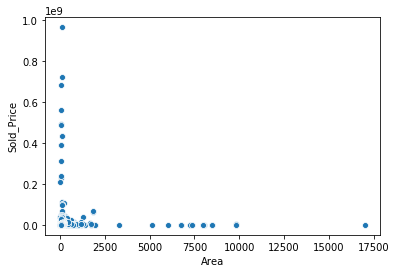

In [65]:
sns.scatterplot(data[(data.Area.notna()) | (data.Area > 0)]['Area'],data[(data.Area.notna()) | (data.Area > 0)]['Sold_Price'])

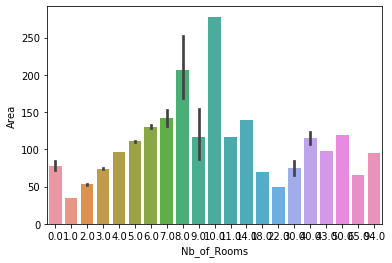

In [66]:
sns.barplot(data[(data.Area.notna()) | (data.Area > 0)]['Nb_of_Rooms'],data[(data.Area.notna()) | (data.Area > 0)]['Area'])

### We can also fill the `'Area'` having null values with the help of `'Nb_of_Rooms'`.
> - `'Area'` is propotional to `'Nb_of_Rooms'` and we can fill it with average value of Area for particular number of room. 

In [67]:
data.Area.isna().sum().sum()

57228

In [0]:
data.loc[((data.Area.isna()) | (data.Area == 0)) & ((data.Nb_of_Rooms.notna()) | (data.Nb_of_Rooms > 0)),'Area'] = \
    data[((data.Area.isna()) | (data.Area == 0)) & ((data.Nb_of_Rooms.notna()) | (data.Nb_of_Rooms > 0))].groupby("Nb_of_Rooms")['Area'].apply(lambda x: x.fillna(x.mean()))

In [69]:
data.Area.isna().sum().sum()

15894

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537834 entries, 0 to 998393
Data columns (total 23 columns):
BBL                    537834 non-null object
Mission_Nb             537834 non-null int64
Apt_ID                 537834 non-null object
Sold_Price             537834 non-null float64
Customer_Nb            537834 non-null int64
Apt_Nb                 537834 non-null int64
Mission_Date           294609 non-null object
Acceptance_Date        382767 non-null object
Transfer_Date          528689 non-null object
Floor                  459142 non-null object
Lift                   537834 non-null bool
Completion_Date        259265 non-null object
Community_Loan         496543 non-null float64
Updated                522920 non-null object
Apt_Type               537834 non-null object
Apt_Category           537716 non-null object
Nb_of_Rooms            497510 non-null float64
Post_Code              500708 non-null object
Street_Nb              526834 non-null float64
Street_Name     

## We need to work more on data cleaning as there are multiple columns having null values.

### Now let's look for average of missing value for each column

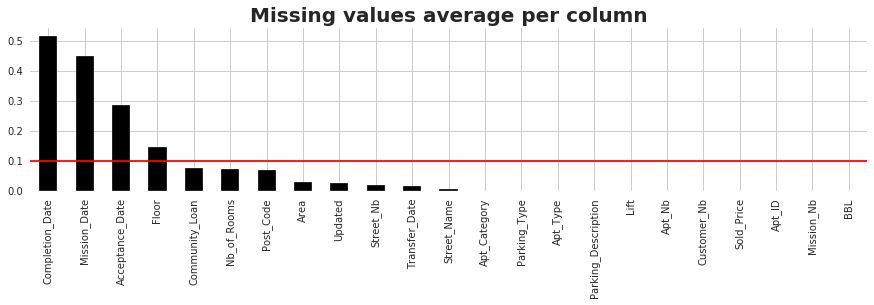

In [71]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
plt.subplots(0,0,figsize=(15,3))
data.isna().mean().sort_values(ascending=False).plot.bar(color='black')
plt.axhline(y=0.1, color='r', linestyle='-')
plt.title('Missing values average per column', fontsize=20, weight='bold' )
plt.show()

> - As of now we will not consider any date so we will drop all date part as they are having around 50% of null values.
> - `'Floor'` is also having more than 10% of null values.

In [0]:
data.drop(['Completion_Date','Acceptance_Date','Mission_Date','Updated','Transfer_Date'],axis = 1, inplace = True)

In [73]:
data.Floor.value_counts()

1       75765
2       70637
3       47839
4       26490
0       25917
        ...  
A514        1
2152        1
8234        1
B222        1
A404        1
Name: Floor, Length: 1652, dtype: int64

> -  **There are few points that we need look for `Floor` column.**
> >  1. Due to multiple random values (around 1652) present in `'Floor'` column due to data entry.
> >  2. After knowing valid values for `'Floor'` column only we can clean it properly.
> >  3. As of now it is better to drop `'Floor'`.
> >  4. We will drop `'Floor'` from dataset.

In [0]:
data.drop('Floor',axis = 1, inplace = True)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537834 entries, 0 to 998393
Data columns (total 17 columns):
BBL                    537834 non-null object
Mission_Nb             537834 non-null int64
Apt_ID                 537834 non-null object
Sold_Price             537834 non-null float64
Customer_Nb            537834 non-null int64
Apt_Nb                 537834 non-null int64
Lift                   537834 non-null bool
Community_Loan         496543 non-null float64
Apt_Type               537834 non-null object
Apt_Category           537716 non-null object
Nb_of_Rooms            497510 non-null float64
Post_Code              500708 non-null object
Street_Nb              526834 non-null float64
Street_Name            534720 non-null object
Parking_Type           537832 non-null object
Parking_Description    537834 non-null object
Area                   521940 non-null float64
dtypes: bool(1), float64(5), int64(3), object(8)
memory usage: 70.3+ MB


> - We will drop records where `'Community_Loan'` and `'Nb_of_Rooms'` having null values.

In [0]:
data.drop(data[(data.Community_Loan.isna()) | (data.Community_Loan == 0)].index,axis = 0,inplace = True)

In [0]:
data.drop(data[data.Nb_of_Rooms.isna()].index,axis = 0, inplace = True)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440780 entries, 0 to 998393
Data columns (total 17 columns):
BBL                    440780 non-null object
Mission_Nb             440780 non-null int64
Apt_ID                 440780 non-null object
Sold_Price             440780 non-null float64
Customer_Nb            440780 non-null int64
Apt_Nb                 440780 non-null int64
Lift                   440780 non-null bool
Community_Loan         440780 non-null float64
Apt_Type               440780 non-null object
Apt_Category           440780 non-null object
Nb_of_Rooms            440780 non-null float64
Post_Code              425893 non-null object
Street_Nb              435924 non-null float64
Street_Name            440647 non-null object
Parking_Type           440778 non-null object
Parking_Description    440780 non-null object
Area                   440713 non-null float64
dtypes: bool(1), float64(5), int64(3), object(8)
memory usage: 57.6+ MB


In [0]:
for i in ['Post_Code','Street_Nb','Street_Name','Parking_Type','Parking_Description','Area']:
    data.drop(data[data[i].isna()].index,axis = 0, inplace = True)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420986 entries, 0 to 998393
Data columns (total 17 columns):
BBL                    420986 non-null object
Mission_Nb             420986 non-null int64
Apt_ID                 420986 non-null object
Sold_Price             420986 non-null float64
Customer_Nb            420986 non-null int64
Apt_Nb                 420986 non-null int64
Lift                   420986 non-null bool
Community_Loan         420986 non-null float64
Apt_Type               420986 non-null object
Apt_Category           420986 non-null object
Nb_of_Rooms            420986 non-null float64
Post_Code              420986 non-null object
Street_Nb              420986 non-null float64
Street_Name            420986 non-null object
Parking_Type           420986 non-null object
Parking_Description    420986 non-null object
Area                   420986 non-null float64
dtypes: bool(1), float64(5), int64(3), object(8)
memory usage: 55.0+ MB


# Outliers detection:
> - Outliers visualization: We can visualize the important features / Sale price scatter plot to find outliers

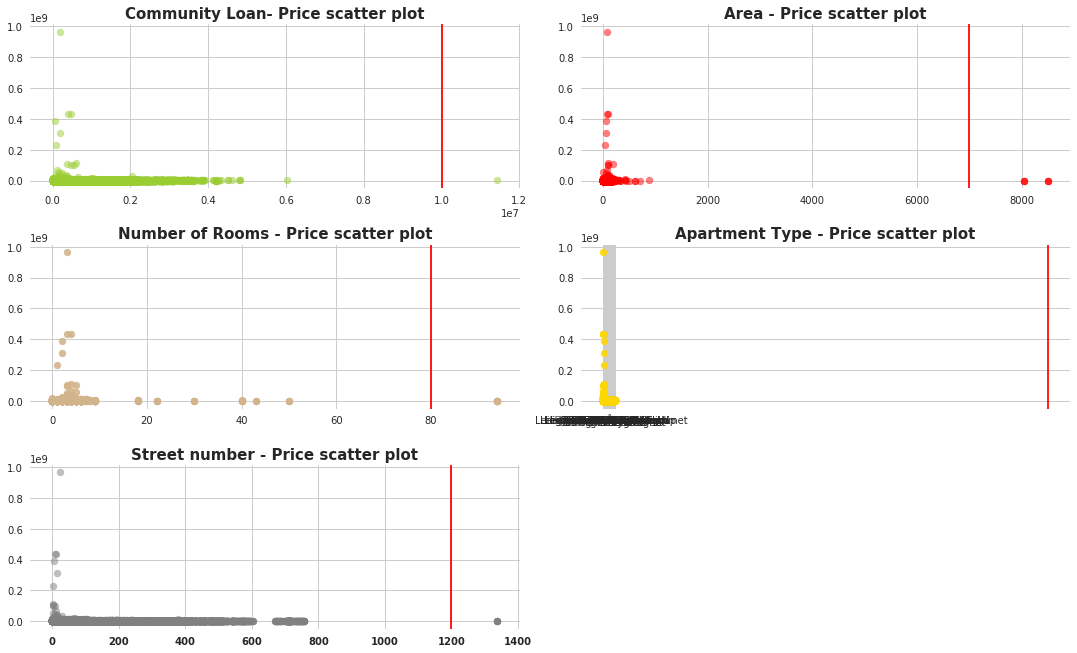

In [81]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((5,2),(0,0))
plt.scatter(x=data['Community_Loan'], y=data['Sold_Price'], color=('yellowgreen'), alpha=0.5)
plt.axvline(x=10e6, color='r', linestyle='-')
plt.title('Community Loan- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(0,1))
plt.scatter(x=data['Area'], y=data['Sold_Price'], color=('red'),alpha=0.5)
plt.axvline(x=7000, color='r', linestyle='-')
plt.title('Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(1,0))
plt.scatter(x=data['Nb_of_Rooms'], y=data['Sold_Price'], color=('tan'),alpha=0.9)
plt.axvline(x=80, color='r', linestyle='-')
plt.title('Number of Rooms - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(1,1))
plt.scatter(x=data['Apt_Type'], y=data['Sold_Price'], color=('gold'),alpha=0.9)
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Apartment Type - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(2,0))
plt.scatter(x=data['Street_Nb'], y=data['Sold_Price'], color=('gray'),alpha=0.5)
plt.axvline(x=1200, color='r', linestyle='-')
plt.title('Street number - Price scatter plot', fontsize=15, weight='bold' )

plt.tight_layout(0.85)
plt.xticks(weight='bold')
plt.show()

> - The outliers are the points in the right that have a larger area or value but a very low sale price. We localize those points by sorting their respective columns.

## Outliers localization


In [82]:
data.columns

Index(['BBL', 'Mission_Nb', 'Apt_ID', 'Sold_Price', 'Customer_Nb', 'Apt_Nb',
       'Lift', 'Community_Loan', 'Apt_Type', 'Apt_Category', 'Nb_of_Rooms',
       'Post_Code', 'Street_Nb', 'Street_Name', 'Parking_Type',
       'Parking_Description', 'Area'],
      dtype='object')

In [83]:
for i in ['Community_Loan', 'Area','Nb_of_Rooms','Street_Nb']:
    if i is not 'Area':
        print(data[i].sort_values(ascending=False).head(1),'\n\n')
    else:
        print(data[i].sort_values(ascending=False).head(2),'\n\n')

829049    11435730.86
Name: Community_Loan, dtype: float64 


456126    8500.0
460533    8500.0
Name: Area, dtype: float64 


660290    94.0
Name: Nb_of_Rooms, dtype: float64 


233583    1338.0
Name: Street_Nb, dtype: float64 




In [0]:
df = data.drop(['Mission_Nb','Apt_ID','Customer_Nb','Apt_Nb'],axis = 1)

In [85]:
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1
print(IQR)
data_df_out = data[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
data_df_out.shape

Sold_Price        2990000.00
Lift                    1.00
Community_Loan     757910.15
Nb_of_Rooms             3.00
Street_Nb             113.00
Area                  111.00
dtype: float64


(416960, 17)

# Visualization after removing the outliers

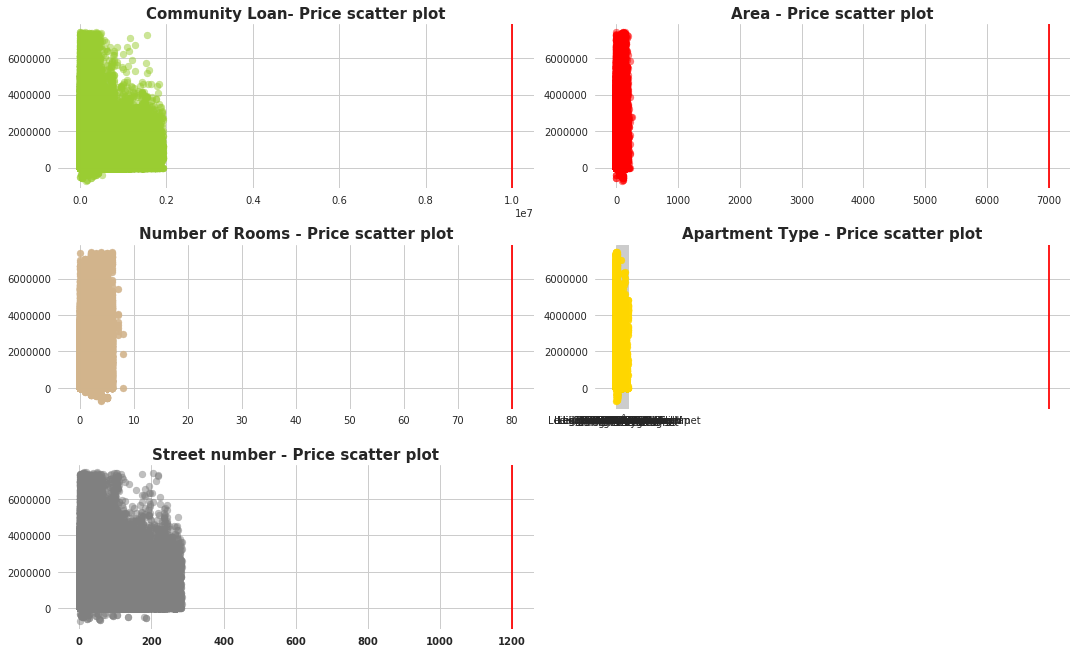

In [86]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((5,2),(0,0))
plt.scatter(x=data_df_out['Community_Loan'], y=data_df_out['Sold_Price'], color=('yellowgreen'), alpha=0.5)
plt.axvline(x=10e6, color='r', linestyle='-')
plt.title('Community Loan- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(0,1))
plt.scatter(x=data_df_out['Area'], y=data_df_out['Sold_Price'], color=('red'),alpha=0.5)
plt.axvline(x=7000, color='r', linestyle='-')
plt.title('Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(1,0))
plt.scatter(x=data_df_out['Nb_of_Rooms'], y=data_df_out['Sold_Price'], color=('tan'),alpha=0.9)
plt.axvline(x=80, color='r', linestyle='-')
plt.title('Number of Rooms - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(1,1))
plt.scatter(x=data_df_out['Apt_Type'], y=data_df_out['Sold_Price'], color=('gold'),alpha=0.9)
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Apartment Type - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(2,0))
plt.scatter(x=data_df_out['Street_Nb'], y=data_df_out['Sold_Price'], color=('gray'),alpha=0.5)
plt.axvline(x=1200, color='r', linestyle='-')
plt.title('Street number - Price scatter plot', fontsize=15, weight='bold' )

plt.tight_layout(0.85)
plt.xticks(weight='bold')
plt.show()

# Let's try to understand `'Sold_Price'` is varying with input features using graphical representation.

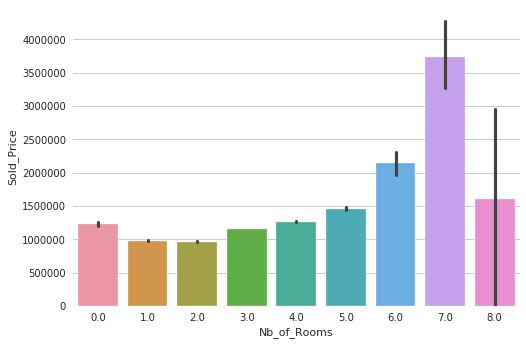

In [87]:
sns.barplot(data_df_out.Nb_of_Rooms,data_df_out.Sold_Price)

> - Apartment having rooms 0 to 5 are sold at price around 1000000 to 1500000.
> - Apartment with rooms 7 are seems to be expensive as their average sold price is almost at 5700000.
> - Also apartment with 6,7 and 18 rooms have average sold price around 2300000 

### Average value of house based on `'Apt_Type'`

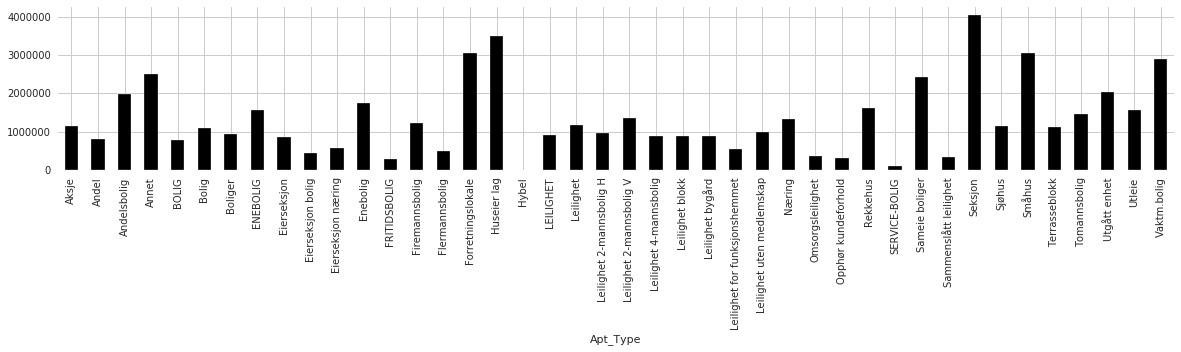

In [88]:
plt.subplots(0,0,figsize=(20,3))
data_df_out.groupby('Apt_Type')['Sold_Price'].mean().plot.bar(color='black')

### Average value of house based on `'Nb_of_Rooms'`

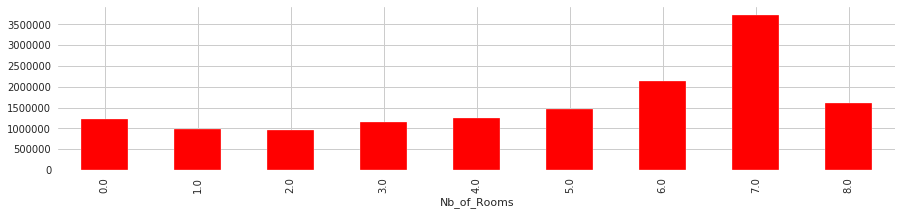

In [89]:
plt.subplots(0,0,figsize=(15,3))
data_df_out.groupby('Nb_of_Rooms')['Sold_Price'].mean().plot.bar(color='red')

### Average value of house based on `'Lift'`

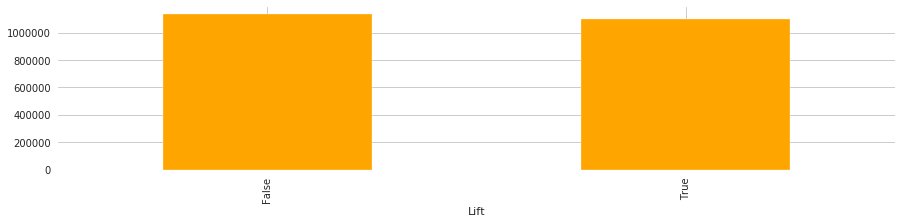

In [90]:
plt.subplots(0,0,figsize=(15,3))
data_df_out.groupby('Lift')['Sold_Price'].mean().plot.bar(color='orange')

### Average value of house based on `'BBL'`

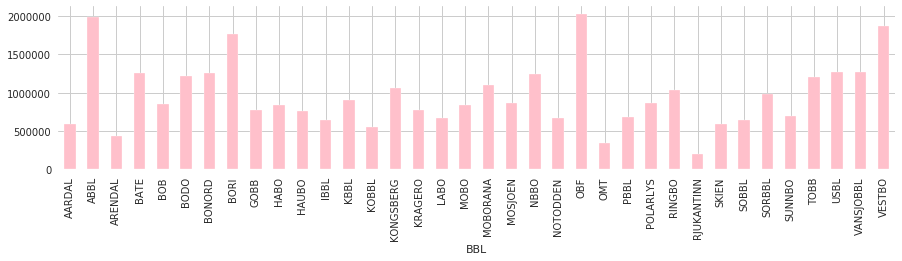

In [91]:
plt.subplots(0,0,figsize=(15,3))
data_df_out.groupby('BBL')['Sold_Price'].mean().plot.bar(color='pink')

### Average value of house price based on `'Parking_Description'` for first top 50, middle 50 and last 50.

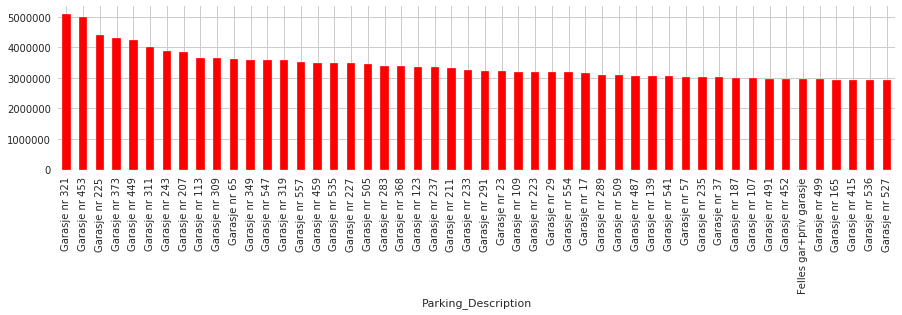

In [92]:
plt.subplots(0,0,figsize=(15,3))
data_df_out.groupby('Parking_Description')['Sold_Price'].mean().sort_values(ascending = False)[0:50].plot.bar(color='red')

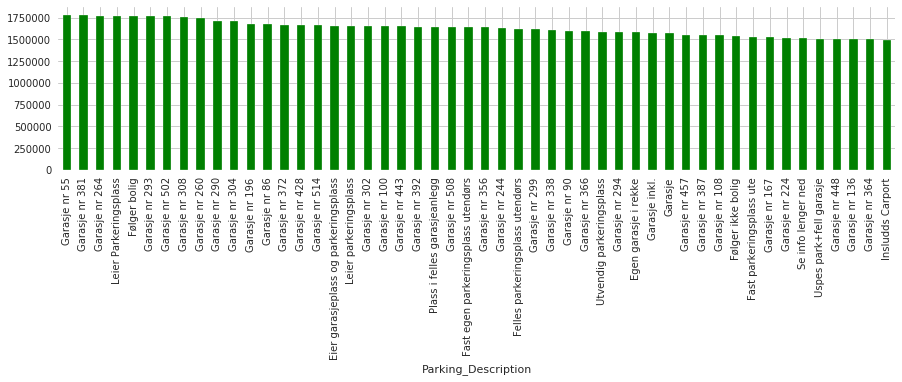

In [93]:
plt.subplots(0,0,figsize=(15,3))
data_df_out.groupby('Parking_Description')['Sold_Price'].mean().sort_values(ascending = False)[225:275].plot.bar(color='green')

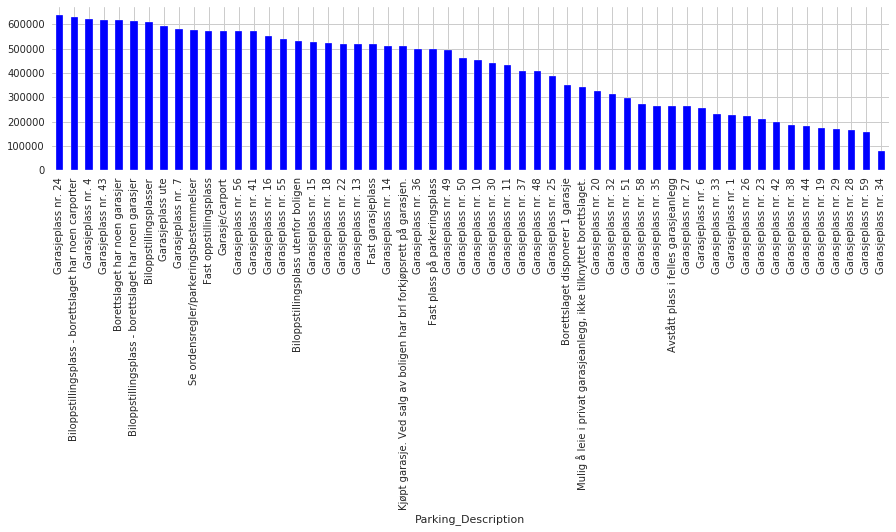

In [94]:
plt.subplots(0,0,figsize=(15,3))
data_df_out.groupby('Parking_Description')['Sold_Price'].mean().sort_values(ascending = False)[450:509].plot.bar(color='blue')

### Average value of house price based on `'Street_Nb'` for first top 50, middle 50 and last 50.

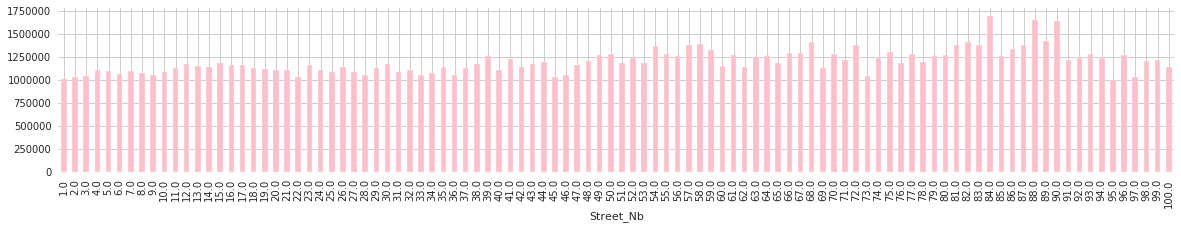

In [95]:
plt.subplots(0,0,figsize=(20,3))
data_df_out.groupby('Street_Nb')['Sold_Price'].mean()[0:100].plot.bar(color='pink')

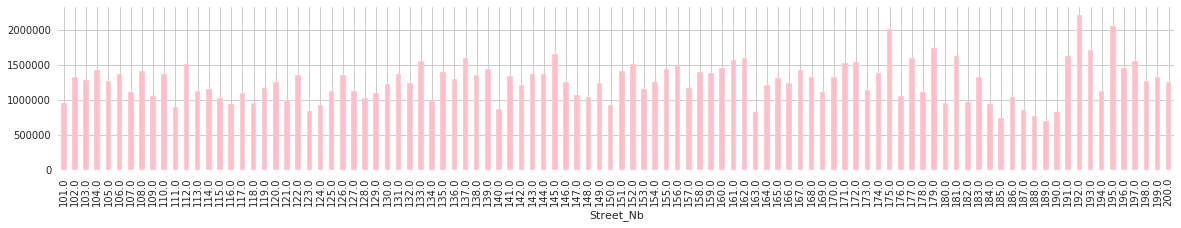

In [96]:
plt.subplots(0,0,figsize=(20,3))
data_df_out.groupby('Street_Nb')['Sold_Price'].mean()[101:200].plot.bar(color='pink')

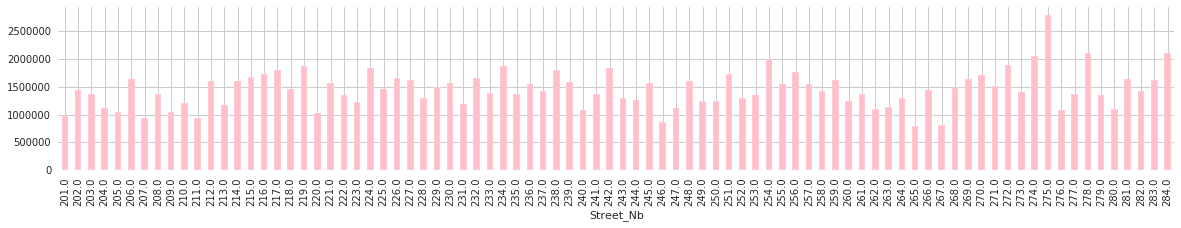

In [97]:
plt.subplots(0,0,figsize=(20,3))
data_df_out.groupby('Street_Nb')['Sold_Price'].mean()[201:284].plot.bar(color='pink')

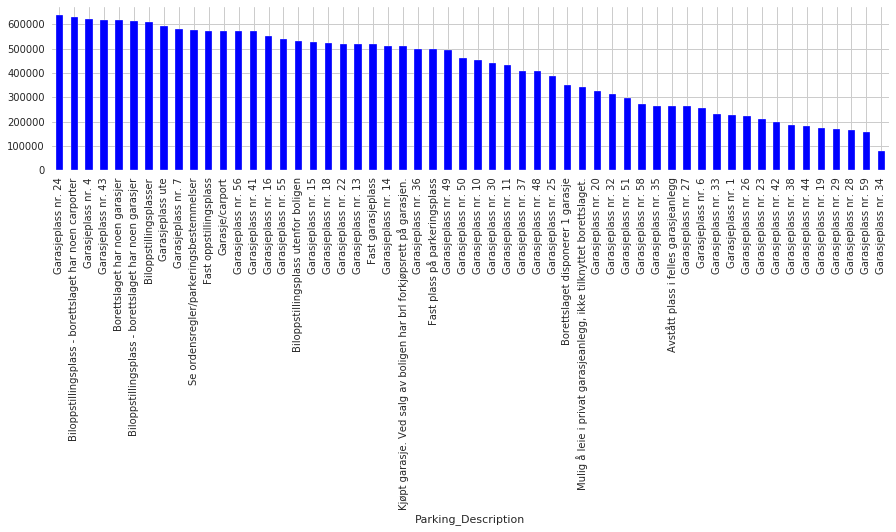

In [98]:
plt.subplots(0,0,figsize=(15,3))
data_df_out.groupby('Parking_Description')['Sold_Price'].mean().sort_values(ascending = False)[450:509].plot.bar(color='blue')

### Average value of house price based on `'Parking_Type'` for first top 50, middle 50 and last 50.

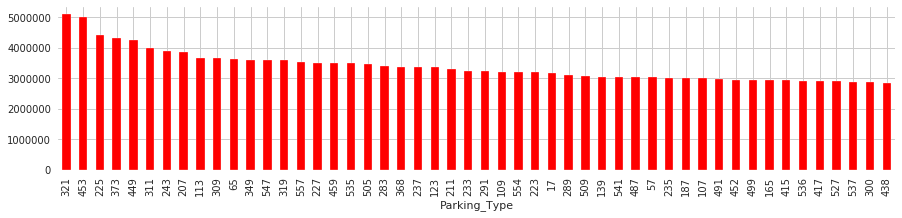

In [99]:
plt.subplots(0,0,figsize=(15,3))
data_df_out.groupby('Parking_Type')['Sold_Price'].mean().sort_values(ascending = False)[0:50].plot.bar(color='red')

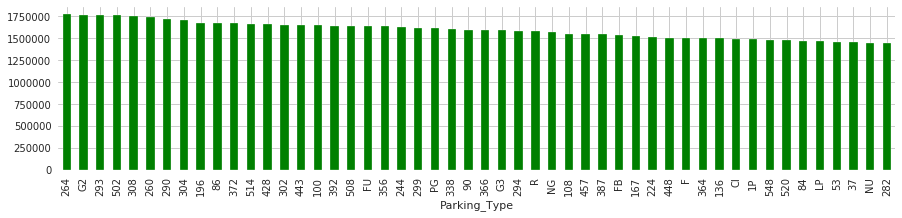

In [100]:
plt.subplots(0,0,figsize=(15,3))
data_df_out.groupby('Parking_Type')['Sold_Price'].mean().sort_values(ascending = False)[200:250].plot.bar(color='green')

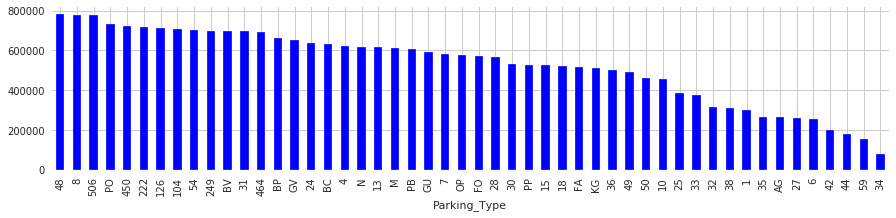

In [101]:
plt.subplots(0,0,figsize=(15,3))
data_df_out.groupby('Parking_Type')['Sold_Price'].mean().sort_values(ascending = False)[400:452].plot.bar(color='blue')

# Machine Learning

In [0]:
# Get dummies
input_data = data_df_out.drop('Sold_Price',axis = 1)
# Get dummies
bbl = pd.get_dummies(input_data.BBL, prefix_sep='_',)
lift = pd.get_dummies(input_data.Lift, prefix_sep='_',) 
apt_type = pd.get_dummies(input_data.Apt_Type, prefix_sep='_',)
apt_category = pd.get_dummies(input_data.Apt_Category, prefix_sep='_',)

In [0]:
nb_of_rooms = pd.get_dummies(input_data.Nb_of_Rooms, prefix_sep='_',)

In [0]:
street_nb = pd.get_dummies(input_data.Street_Nb, prefix_sep='_',)

In [0]:
street_name = pd.get_dummies(input_data.Street_Name, prefix_sep='_',)

In [0]:
parking_type = pd.get_dummies(input_data.Parking_Type, prefix_sep='_',)

In [0]:
post_code = pd.get_dummies(input_data.Post_Code, prefix_sep='_',)

In [0]:
parking_description = pd.get_dummies(input_data.Parking_Description, prefix_sep='_',)

In [0]:
cols = [bbl,lift,apt_type,apt_category,nb_of_rooms,street_nb,street_name,parking_type,post_code,parking_description]

In [110]:
for i in cols:
    print('Shape is' , i.shape)

Shape is (416960, 36)
Shape is (416960, 2)
Shape is (416960, 42)
Shape is (416960, 7560)
Shape is (416960, 9)
Shape is (416960, 284)
Shape is (416960, 4319)
Shape is (416960, 450)
Shape is (416960, 1776)
Shape is (416960, 506)


In [111]:
data_df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416960 entries, 0 to 998393
Data columns (total 17 columns):
BBL                    416960 non-null object
Mission_Nb             416960 non-null int64
Apt_ID                 416960 non-null object
Sold_Price             416960 non-null float64
Customer_Nb            416960 non-null int64
Apt_Nb                 416960 non-null int64
Lift                   416960 non-null bool
Community_Loan         416960 non-null float64
Apt_Type               416960 non-null object
Apt_Category           416960 non-null object
Nb_of_Rooms            416960 non-null float64
Post_Code              416960 non-null object
Street_Nb              416960 non-null float64
Street_Name            416960 non-null object
Parking_Type           416960 non-null object
Parking_Description    416960 non-null object
Area                   416960 non-null float64
dtypes: bool(1), float64(5), int64(3), object(8)
memory usage: 74.5+ MB


In [0]:
df_cat = pd.concat([data_df_out[['Sold_Price','Area']],bbl,lift,apt_type,nb_of_rooms,parking_type],axis = 1)

In [117]:
df_cat.shape

(416960, 541)

In [0]:
df_cat.to_csv(r'df_cat.csv',index = False)

In [0]:
house = data_df_out[['Sold_Price','Area','BBL','Lift','Apt_Type','Nb_of_Rooms','Post_Code','Parking_Type']]

In [0]:
house.Sold_Price = abs(house.Sold_Price)

In [0]:
house.drop(house[house.Sold_Price <= 100].index,axis = 0,inplace = True)

In [143]:
house.shape

(389952, 8)

In [0]:
house.to_csv(r'House_Price_Predict.csv',index = False)

In [0]:
from sklearn.preprocessing import LabelEncoder
house.Post_Code = house.Post_Code.astype('str')
X_enc = house.apply(LabelEncoder().fit_transform)

In [145]:
X_enc.head(6)

,Sold_Price,Area,BBL,Lift,Apt_Type,Nb_of_Rooms,Post_Code,Parking_Type
0,12371,89,3,0,18,4,898,439
1,2691,32,30,0,18,2,1047,386
5,8247,78,18,0,18,4,1662,411
6,11863,65,18,0,18,3,1658,374
21,12331,0,35,0,2,5,1095,445
24,11254,50,35,0,2,2,1116,445


In [0]:
X_nf = X_enc.drop('Sold_Price',axis = 1)
y_nf = X_enc['Sold_Price']

In [0]:
#X = hs.drop('Sold_Price',axis = 1)

In [0]:
#y = np.array(hs['Sold_Price'])

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
X_train.shape

(333568, 1)

In [0]:
X_test.shape

(83392, 1)

In [0]:
y_train.shape

(333568,)

In [0]:
y_test.shape

(83392,)

# Trying Neural Network to predict House Price


In [0]:
%tensorflow_version 2.x
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from xgboost import XGBRegressor
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
import tensorflow as tf
print(tf.__version__)
#Clear out tensorflow memory
tf.keras.backend.clear_session()

2.1.0-rc1


In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

In [0]:
from keras import initializers
NN_model = tf.keras.models.Sequential()

# batch Normalization 
NN_model.add(tf.keras.layers.BatchNormalization())

# The Input Layer :
NN_model.add(tf.keras.layers.Dense(1,input_dim = X_train.shape[1], activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=None)))

# batch Normalization 
NN_model.add(tf.keras.layers.BatchNormalization())

# The Hidden Layers :
NN_model.add(tf.keras.layers.Dense(256,activation='relu',))
NN_model.add(tf.keras.layers.Dense(256,activation='relu'))
NN_model.add(tf.keras.layers.Dense(256,activation='relu'))

# The Output Layer :
NN_model.add(tf.keras.layers.Dense(1, kernel_initializer='normal',activation='linear'))

In [0]:
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [0]:
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch multiple                  4         
_________________________________________________________________
dense_10 (Dense)             multiple                  2         
_________________________________________________________________
batch_normalization_5 (Batch multiple                  4         
_________________________________________________________________
dense_11 (Dense)             multiple                  512       
_________________________________________________________________
dense_12 (Dense)             multiple                  65792     
_________________________________________________________________
dense_13 (Dense)             multiple                  65792     
_________________________________________________________________
dense_14 (Dense)             multiple                 

In [0]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [0]:
NN_model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 266854 samples, validate on 66714 samples
Epoch 1/15
266368/266854 [============================>.] - ETA: 0s - loss: 749629.6889 - mean_absolute_error: 749631.0000
Epoch 00001: val_loss improved from inf to 737470.99558, saving model to Weights-001--737470.99558.hdf5
266854/266854 [==============================] - 29s 110us/sample - loss: 749566.9771 - mean_absolute_error: 749568.1875 - val_loss: 737470.9956 - val_mean_absolute_error: 737470.5625
Epoch 2/15
266560/266854 [============================>.] - ETA: 0s - loss: 736188.8058 - mean_absolute_error: 736188.6250
Epoch 00002: val_loss did not improve from 737470.99558
266854/266854 [==============================] - 29s 107us/sample - loss: 736225.4041 - mean_absolute_error: 736225.1875 - val_loss: 737698.1456 - val_mean_absolute_error: 737697.5625
Epoch 3/15
266624/266854 [============================>.] - ETA: 0s - loss: 736422.9983 - mean_absolute_error: 736423.1250
Epoch 00003: val_loss improved from 737470.99558 to 

In [0]:
# Load wights file of the best model :
wights_file = 'Weights-014--737373.71154.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [0]:
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'Y_test':y_test,'SalePrice':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')

predictions = NN_model.predict(X_test)
make_submission(predictions[:,0],'submission(NN)_1.csv')

A submission file has been made


# Random Forest Algorithm to predict House Price with parameter tunning.

In [0]:
xx_train, xx_test, yy_train, yy_test = train_test_split(X_nf, y_nf, test_size=0.10, random_state=5)

In [0]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [0]:
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [0]:
# Fit the grid search to the data
grid_search.fit(xx_train, yy_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 61.7min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 89.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [0]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 1000}

In [149]:
regr = RandomForestRegressor(bootstrap = True,max_depth = 200,max_features = 5,min_samples_leaf = 10,min_samples_split = 15,n_estimators = 3000)
regr.fit(xx_train, yy_train)
#print(regr.feature_importances_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=200, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=3000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [150]:
regr.score(xx_test,yy_test)

0.39377012398813993

In [0]:
p = regr.predict(xx_test)

In [152]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(yy_test, p))
print('Mean Squared Error:', metrics.mean_squared_error(yy_test, p))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yy_test, p)))

Mean Absolute Error: 1977.0655983842898
Mean Squared Error: 6317688.975104974
Root Mean Squared Error: 2513.5013377965356
